
<p><center style="color:#ff69b4; font-family:Arial; font-size:30px;">Thanks for visiting my notebook👀 </center></p>

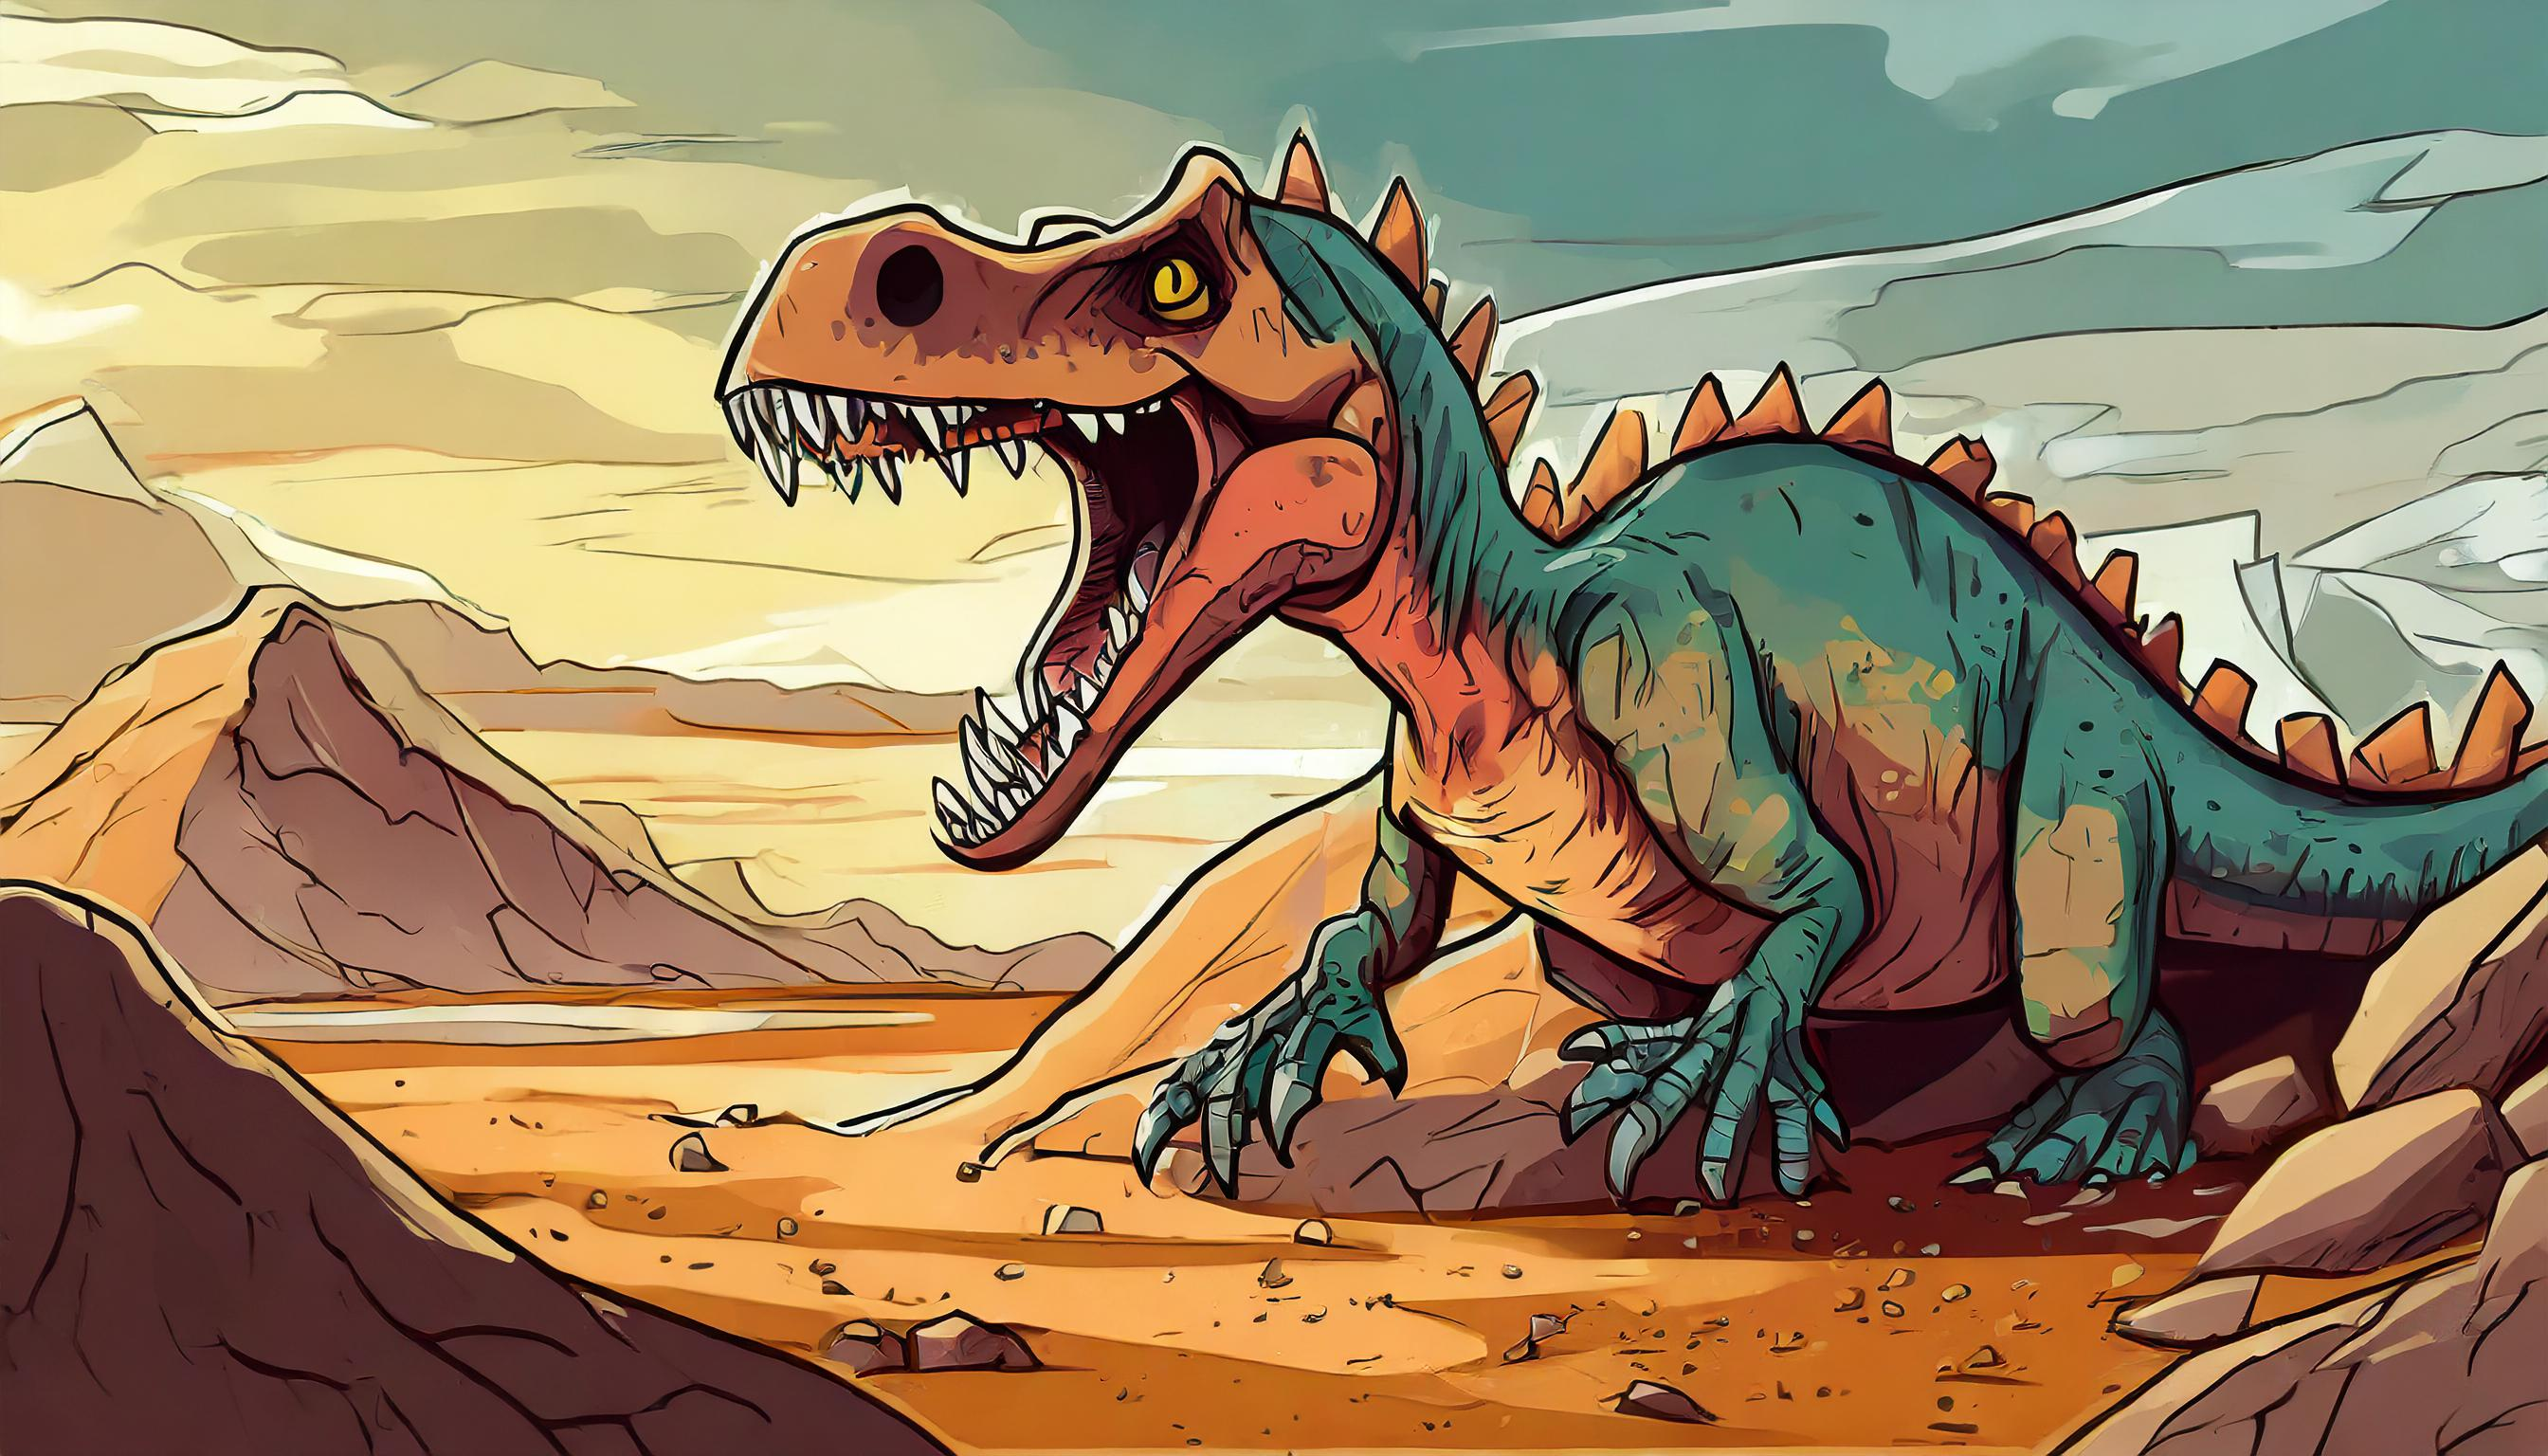

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import seaborn as sns
import folium

<a id="3"></a>
# <p style="padding:20px;background-color:#ffc0cb ;margin:0;color:#696969;font-family: 'Times New Roman';font-size:90%;text-align:center;border-radius: 15px 80px;overflow:hidden;font-weight:100 ; border: 2px solid #db7093; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">Data </p>

In [2]:
df = pd.read_csv('/kaggle/input/extinction-of-a-species-data/extinct_species_dataset.csv')
df.head(5)

,Species Name,Years Lived (Million Years),Extinction Reason
0,Trilobite,337.75,Human Impact
1,Smilodon,311.57,Natural Disaster
2,Dodo,67.49,Mass Extinction
3,Woolly Mammoth,89.81,Asteroid Impact
4,Woolly Mammoth,395.72,Climate Change


In [3]:
len(df)

1000000

<a id="3"></a>
# <p style="padding:20px;background-color:#ffc0cb ;margin:0;color:#696969;font-family: 'Times New Roman';font-size:90%;text-align:center;border-radius: 15px 80px;overflow:hidden;font-weight:100 ; border: 2px solid #db7093; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">matplotlib - pie chart </p>

In this case, since the dataset is large, we have narrowed it down to 50,000 records and displayed the breakdown of extinction reasons using a pie chart.
Little to no change

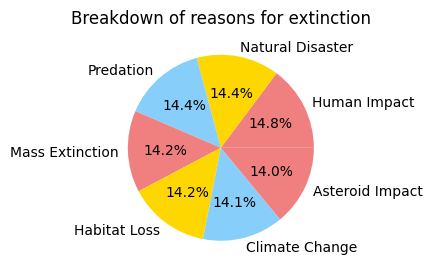

In [4]:
# Randomly sample 10,000 rows
df_sampled = df.sample(n=50000, random_state=42)
df_sampled.head(3)
plt.figure(figsize=(3, 4))
extinction_reason_counts = df_sampled['Extinction Reason'].value_counts()
plt.pie(extinction_reason_counts, labels=extinction_reason_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'gold', 'lightskyblue'])
plt.title('Breakdown of reasons for extinction')
plt.show()

<a id="3"></a>
# <p style="padding:20px;background-color:#ffc0cb ;margin:0;color:#696969;font-family: 'Times New Roman';font-size:90%;text-align:center;border-radius: 15px 80px;overflow:hidden;font-weight:100 ; border: 2px solid #db7093; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">seaborn - countplot </p>

In this case, since the dataset is large, we have narrowed it down to 50,000 records and displayed the breakdown of extinction reasons using a bar chart to count and visualize the data.

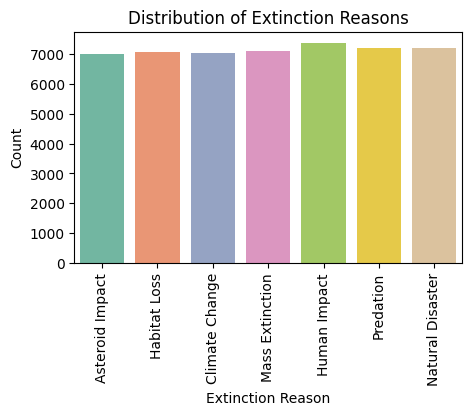

In [5]:
# Count plot for Extinction Reason
plt.figure(figsize=(5, 3))
sns.countplot(data=df_sampled, x='Extinction Reason', palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Extinction Reason')
plt.ylabel('Count')
plt.title('Distribution of Extinction Reasons')
plt.show()

<a id="3"></a>
# <p style="padding:20px;background-color:#ffc0cb ;margin:0;color:#696969;font-family: 'Times New Roman';font-size:90%;text-align:center;border-radius: 15px 80px;overflow:hidden;font-weight:100 ; border: 2px solid #db7093; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">Nunique - Table </p>

The code creates a DataFrame that not only shows the number of unique values but also includes the unique values themselves for each column.

In [6]:
agg_df = df.agg(["nunique", "unique", lambda x: x.isna().sum(), "dtypes"]).T
agg_df['unique'] = agg_df['unique'].apply(lambda x: x if len(x) < 10 else x[:10])
colors = sns.color_palette("coolwarm", 10)
def color_rows(s):
    return ['background-color: rgba({}, {}, {}, 0.5)'.format(int(colors[0][0]*255), 
                                                             int(colors[0][1]*255), 
                                                             int(colors[0][2]*255)) if i % 2 == 0 else 
            'background-color: rgba({}, {}, {}, 0.5)'.format(int(colors[5][0]*255), 
                                                             int(colors[5][1]*255), 
                                                             int(colors[5][2]*255)) for i in range(len(s))]
styled_df = agg_df.style.apply(color_rows, axis=1)
styled_df

,nunique,unique,,dtypes
Species Name,10,['Trilobite' 'Smilodon' 'Dodo' 'Woolly Mammoth' 'Tyrannosaurus Rex' 'Plesiosaur' 'Quagga' 'Megalodon' 'Steller’s Sea Cow' 'Sabertooth Tiger'],0,object
Years Lived (Million Years),49901,[337.75 311.57 67.49 89.81 395.72 44.99 334.35 42.87 264.58 54.16],0,float64
Extinction Reason,7,['Human Impact' 'Natural Disaster' 'Mass Extinction' 'Asteroid Impact' 'Climate Change' 'Predation' 'Habitat Loss'],0,object


<a id="3"></a>
# <p style="padding:20px;background-color:#ffc0cb ;margin:0;color:#696969;font-family: 'Times New Roman';font-size:90%;text-align:center;border-radius: 15px 80px;overflow:hidden;font-weight:100 ; border: 2px solid #db7093; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">mean unique - Table </p>

Displaying the average lifespan by species name.

In [7]:
# Average lifespan by Species Name
species_avg_years_lived = df.groupby('Species Name')['Years Lived (Million Years)'].mean().round(2)
result_df = pd.DataFrame(species_avg_years_lived).sort_values(by='Years Lived (Million Years)', ascending=False).reset_index()
result_df['Years Lived (Million Years)'] = result_df['Years Lived (Million Years)'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
styled_df = result_df.style.background_gradient(subset='Years Lived (Million Years)', cmap='Blues')
styled_df


,Species Name,Years Lived (Million Years)
0,Trilobite,251.71
1,Woolly Mammoth,251.01
2,Plesiosaur,250.99
3,Sabertooth Tiger,250.86
4,Dodo,250.8
5,Megalodon,250.74
6,Quagga,250.47
7,Smilodon,250.4
8,Steller’s Sea Cow,249.98
9,Tyrannosaurus Rex,249.22


Displaying the average lifespan and extinction reasons by species.

In [8]:
# Average Years Lived by Species Name
result_df = pd.DataFrame(species_avg_years_lived).sort_values(by='Years Lived (Million Years)', ascending=False).reset_index()
result_df['Years Lived (Million Years)'] = result_df['Years Lived (Million Years)'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
styled_df = result_df.style.background_gradient(subset='Years Lived (Million Years)', cmap='Purples')
styled_df

,Species Name,Years Lived (Million Years)
0,Trilobite,251.71
1,Woolly Mammoth,251.01
2,Plesiosaur,250.99
3,Sabertooth Tiger,250.86
4,Dodo,250.8
5,Megalodon,250.74
6,Quagga,250.47
7,Smilodon,250.4
8,Steller’s Sea Cow,249.98
9,Tyrannosaurus Rex,249.22
